<a href="https://colab.research.google.com/github/Gythrie/DAP1-MostStreamedMusics/blob/main/MostStreamedMusic_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
md = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

In [ ]:
md.shape

(953, 24)

In [ ]:
md.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
md.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
md.drop(columns = ['key' ,'mode'] , axis = 1 , inplace = True)

In [ ]:
md['in_shazam_charts'].fillna(0,inplace = True)


In [ ]:
md.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [ ]:
md.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [ ]:
md['streams'] = pd.to_numeric(md['streams'], errors='coerce')
md['in_deezer_playlists'] = pd.to_numeric(md['in_deezer_playlists'], errors='coerce')
md['in_shazam_charts'] = pd.to_numeric(md['in_shazam_charts'], errors='coerce')

In [ ]:
md[['streams','in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts']].describe()

,streams,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
count,9.520000e+02,953.000000,953.000000,953.000000,946.000000
mean,5.141374e+08,12.009444,51.908709,2.666317,48.471459
std,5.668569e+08,19.575992,50.630241,6.035599,123.628106
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000
25%,1.416362e+08,0.000000,7.000000,0.000000,0.000000
50%,2.905309e+08,3.000000,38.000000,0.000000,2.000000
75%,6.738690e+08,16.000000,87.000000,2.000000,32.750000
max,3.703895e+09,147.000000,275.000000,58.000000,953.000000


#EDA

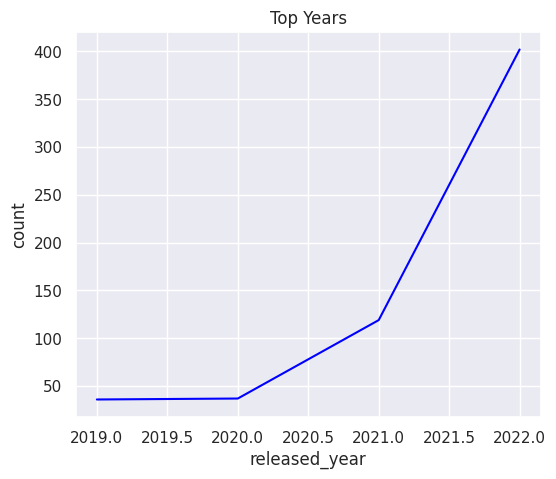

In [ ]:
year_count = md['released_year'].value_counts()
topyears = year_count.nlargest().index
datayears = md[md['released_year'].isin(topyears) & (md['released_year'] != 2023)]

grouped_data = datayears.groupby('released_year').size().reset_index(name='count')
plt.figure(figsize=(6, 5))

sns.lineplot(x='released_year', y='count', data=grouped_data, color='blue')
plt.title('Top Years')
plt.show()


According to the data the number of music release peaked in 2022 with release of above 400 songs. The songs released in 2022 got the highest streams according to data. Generally the songs released in the recent years get more streams.

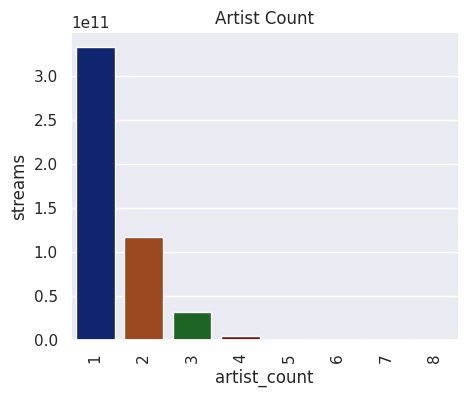

In [ ]:
md_art = md.groupby(['artist_count'], as_index = False)['streams'].sum().sort_values(by = 'streams' , ascending = False)
plt.figure(figsize=(5, 4))
sns.barplot(x = 'artist_count' , y = 'streams' , data = md_art , palette = 'dark' , hue  = 'artist_count' , legend = False )
plt.xticks(rotation = 90)
plt.title('Artist Count')
plt.show()

Solo tracks are most streamed across platforms than songs with multiple artists.

<ipython-input-88-019864b97503>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'track_name' , y = 'streams' , data = md_streams,palette = 'dark')


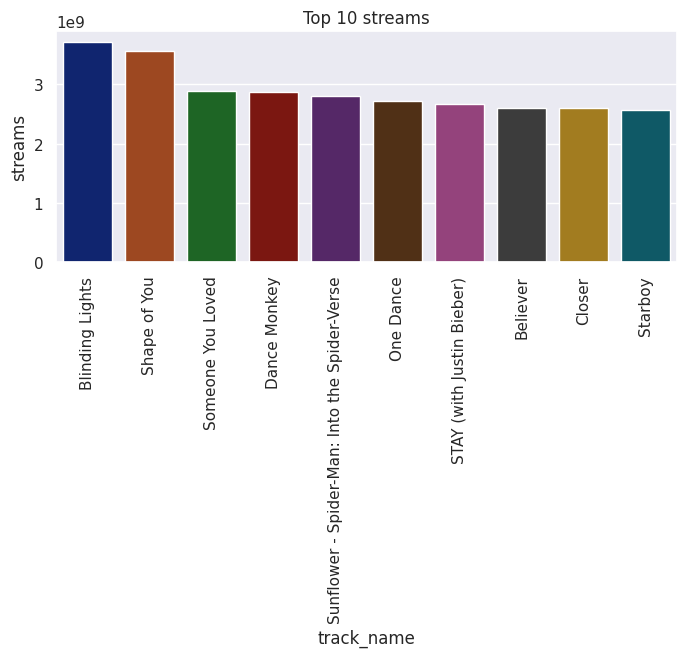

In [ ]:
md_streams = md.groupby(['track_name'], as_index = False)['streams'].sum().sort_values(by = 'streams', ascending = False).head(10)

plt.figure(figsize=(8, 3))

plt.title('Top 10 streams')

sns.barplot(x = 'track_name' , y = 'streams' , data = md_streams,palette = 'dark')
# sns.set(rc={'figure.figsize':(10,10)})
plt.xticks(rotation = 90)
plt.show()

In [ ]:
md.groupby(['track_name'], as_index = False).agg({'artist(s)_name' : 'first' , 'streams' : 'sum' }).sort_values(by = 'streams', ascending = False).head(10)

,track_name,artist(s)_name,streams
100,Blinding Lights,The Weeknd,3.703895e+09
693,Shape of You,Ed Sheeran,3.562544e+09
723,Someone You Loved,Lewis Capaldi,2.887242e+09
184,Dance Monkey,Tones and I,2.864792e+09
753,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09
563,One Dance,"Drake, WizKid, Kyla",2.713922e+09
662,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2.665344e+09
87,Believer,Imagine Dragons,2.594040e+09
153,Closer,"The Chainsmokers, Halsey",2.591224e+09
736,Starboy,"The Weeknd, Daft Punk",2.565530e+09


In [ ]:
md.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

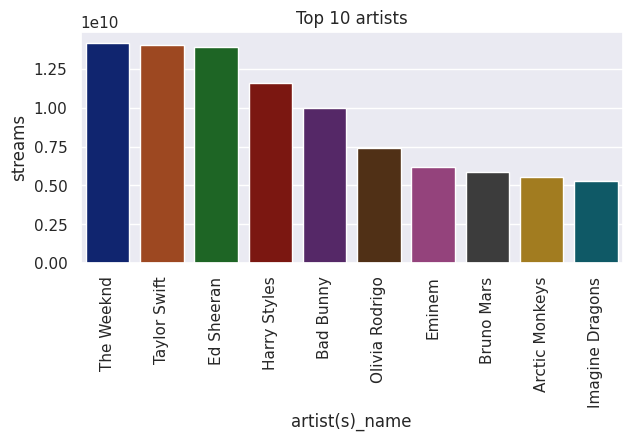

In [ ]:
md_art = md.groupby(['artist(s)_name'], as_index = False)['streams'].sum().sort_values(by = 'streams' , ascending = False).head(10)
plt.figure(figsize=(7, 3))
plt.xticks(rotation = 90)
sns.barplot(x = 'artist(s)_name' , y = 'streams' , data = md_art , palette = 'dark' , hue= 'artist(s)_name', legend = False)
plt.title('Top 10 artists')

plt.show()

The most streamed song is 'Blinding Lights' by The Weeknd	with a stream of 3.7 billion. The most heard artist is The Weeknd itself with a total stream of 14 billion.

Top artists include The Weeknd,Taylor Swift and Ed Sgeeran

In [ ]:
md.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

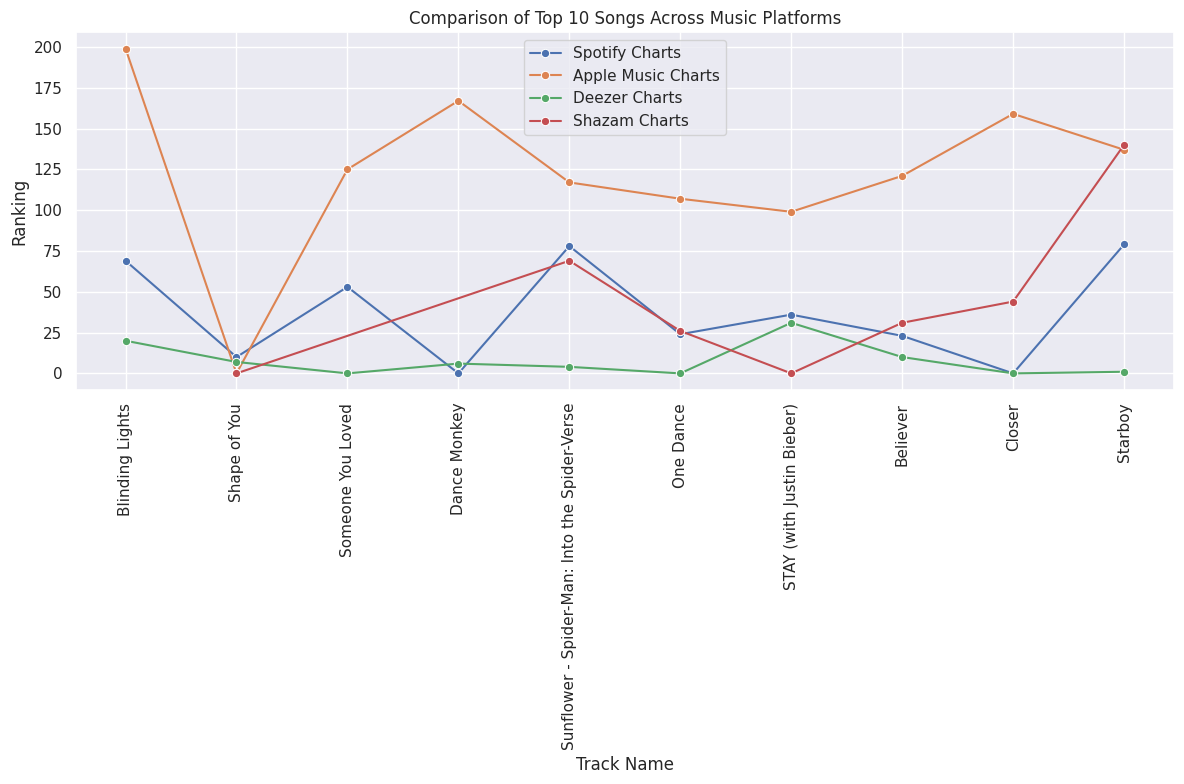

In [ ]:
top_songs = md.nlargest(10, 'streams')

plt.figure(figsize=(12, 8))

sns.lineplot(data=top_songs, x='track_name', y='in_spotify_charts', marker = 'o', label='Spotify Charts')
sns.lineplot(data=top_songs, x='track_name', y='in_apple_charts', marker='o', label='Apple Music Charts')
sns.lineplot(data=top_songs, x='track_name', y='in_deezer_charts', marker='o', label='Deezer Charts')
sns.lineplot(data=top_songs, x='track_name', y='in_shazam_charts', marker='o', label='Shazam Charts')

plt.xlabel('Track Name')
plt.ylabel('Ranking')
plt.title('Comparison of Top 10 Songs Across Music Platforms')
plt.xticks(rotation=90)

plt.legend()

plt.tight_layout()
plt.show()


Shape of You by Ed Sheeran has a high rating on all the platforms.
The most streamed song of all time 'Blinding Lights' by The Weeknd, despite being the most streamed song according to Deezer Charts, holds a lower rank in Apple Music Charts and does not appear in the Shazam Charts.


In [ ]:
md.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'overall_ranking'],
      dtype='object')

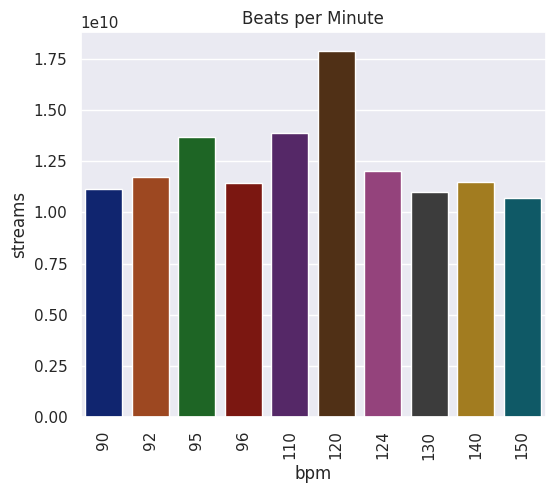

In [ ]:
md_beats = md.groupby(['bpm'], as_index = False)['streams'].sum().sort_values(by = 'streams' , ascending = False).head(10)
sns.barplot(x = 'bpm' , y = 'streams' , data = md_beats, palette = 'dark' , hue = 'bpm' , legend = False )
plt.title('Beats per Minute')
sns.set(rc={'figure.figsize':(5,3)})
plt.xticks(rotation = 90)
plt.show()

 songs with a tempo ranging between 100 to 130 beats per minute experience higher streaming rates.

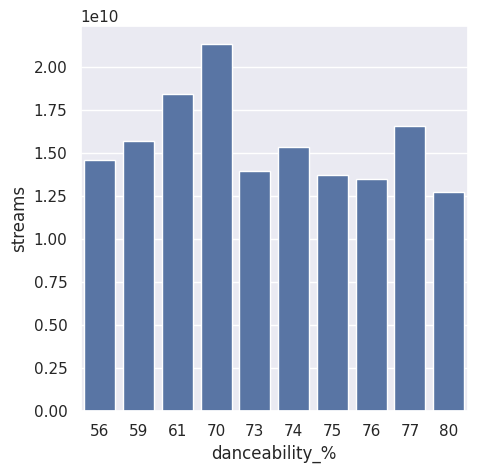

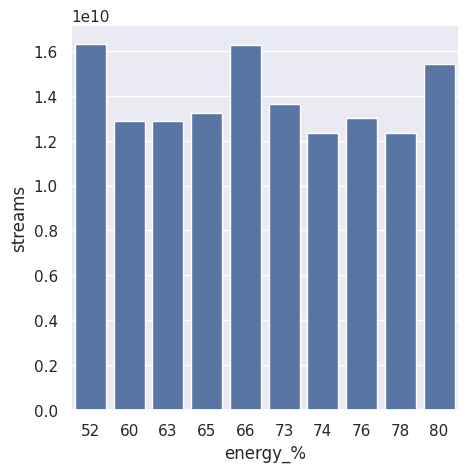

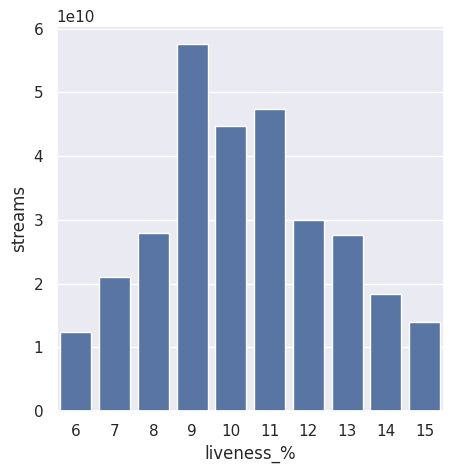

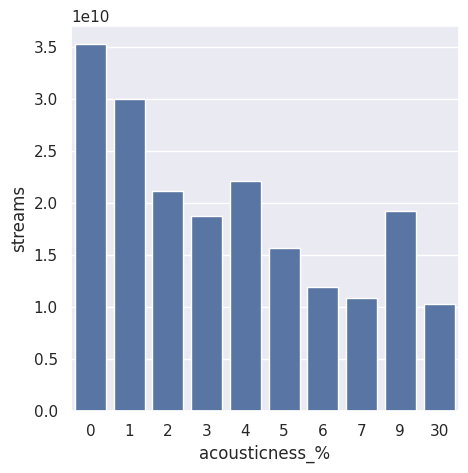

In [ ]:
# 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
md_dan = md.groupby(['danceability_%'], as_index = False)['streams'].sum().sort_values(by = 'streams' , ascending = False).head(10)
sns.barplot(x = 'danceability_%' , y = 'streams' , data = md_dan)
plt.show()
md_ene = md.groupby(['energy_%'], as_index = False)['streams'].sum().sort_values(by = 'streams' , ascending = False).head(10)
sns.barplot(x = 'energy_%', y = 'streams' , data = md_ene)
plt.show()
md_live = md.groupby(['liveness_%'], as_index = False)['streams'].sum().sort_values(by = 'streams' , ascending = False).head(10)
sns.barplot(x = 'liveness_%' , y = 'streams' , data = md_live)
plt.show()
md_acc = md.groupby(['acousticness_%'], as_index = False)['streams'].sum().sort_values(by = 'streams' , ascending = False).head(10)
sns.barplot(x = 'acousticness_%' , y = 'streams' , data = md_acc)
plt.show()

Songs with a danceability score of 70% tend to accumulate higher stream counts.
Songs with liveliness scores between 9 and 12% demonstrate increased streaming popularity.
Songs approaching zero acousticness exhibit higher streaming frequencies.